### Confidence Intervals for the ERP (Method 1) <a id="cis-m1"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.io import loadmat       # Import function to read data.
data = loadmat('EEG-1.mat')
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]
ntrials = EEGa.shape[0]
nsamples = EEGa.shape[1]

In [3]:
mn = EEGa.mean(0)  # Compute the mean across trials (the ERP)

In [4]:
sd = EEGa.std(0)  # Compute the std across trials

In [5]:
sdmn = sd / np.sqrt(ntrials)  # Compute the std of the mean

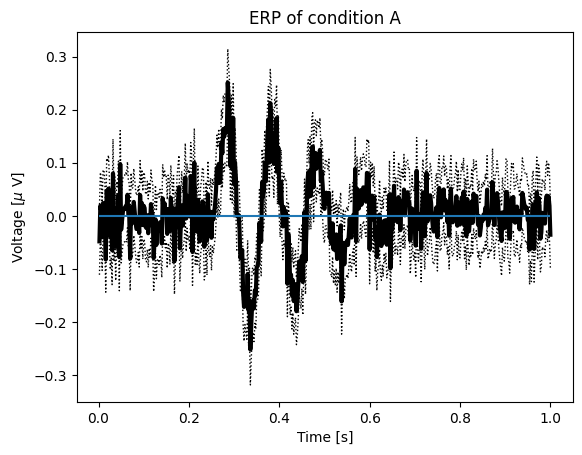

In [6]:
plt.plot(t, mn, 'k', lw=3)              # Plot the ERP of condition A
plt.plot(t, mn + 2 * sdmn, 'k:', lw=1)  # ... and include the upper CI
plt.plot(t, mn - 2 * sdmn, 'k:', lw=1)  # ... and the lower CI
plt.xlabel('Time [s]')                     # Label the axes
plt.ylabel('Voltage [$\mu$ V]')
plt.title('ERP of condition A')            # ... provide a useful title
plt.hlines(0, t[0], t[-1]);

### Confidence Intervals for the ERP (Method 2)

This is challenge 1

In [7]:
# Example: Draw 1000 integers with replacement from [0, 1000)
# np.random.seed(0) #get the same random numbers every time
i = np.random.randint(0, ntrials, size=ntrials) #what does random.randint do
print(i)

[770 887 624 515 290 814 347 836 357 841 926 545 990 944 323 626 396 784
 264  43 134 875 945 695 660  36 348 410 445 657 834 720 338 452 812  99
 944 891 387 832 885 854 531 410 582 296 827 905 766 710 408 962 235 568
 608 532 643  17 917 907 322 897 995 879 195 270  25 179 420 469 796 282
 966 736 544  79  17  15 508  54 761 643 692 449  49 883 681 598 974 872
 603 560 156 883 337  30 480 684 990 370 419 526 716 189 925 990 659 503
 694 637 960 985 869 906 532 780 778 292 445 900 207 167 860  77 290 260
 764 508 547 973 992 531 909 594 482 357 950 792  20 295  43 759 195 672
 571 942 276 217 111 859 225 764 952 175 603 737 367 847 713 359 981 868
 312 334 315  14 815   9  69 415 783 820  10 955 367 432 798  80 270 467
 724 152 105 606 513 389 103 482 406 947 862 593 368  78 429 614 926 352
 314 805 382 725 605 967 572 819 958 409 925 973 748  52  69 685 947 761
 357 824 556 328  43 313  94 540 937 384 937 633 985 484 600 161 201 811
 131 569 707 564 174 805 806 586 404 551 226 128 40

In [8]:
EEG0 = EEGa[i,:]        # Create a resampled EEG.
                        # Q: What is the shape of the resampled EEG?
print(EEG0.shape)
print(EEGa.shape)

(1000, 500)
(1000, 500)


In [9]:
ERP0 = EEG0.mean(0)     # Create the resampled ERP AVERAGE ACROSS ROWS (0 = rows)
                        # Q: What is the difference between the resampled EEG and resampled ERP?
                        # Q: What does the resampled ERP look like?

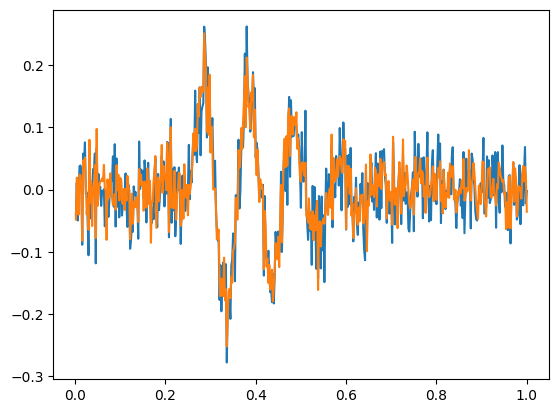

In [10]:
plt.plot(t,ERP0) #resampled dataset in blue
plt.plot(t,mn) #original dataset

In [11]:
N_resample = 3000
ERP0 = np.zeros((N_resample, nsamples))
for k in np.arange(0,N_resample):
    i = np.random.randint(0, ntrials, size=ntrials)  # Create resampled indices.
    EEG0 = EEGa[i,:]   # Create a resampled EEG. : means everything, all columns
    ERP0[k,:] = EEG0.mean(0)  # Create the resampled ERP (and fill in all columsn for the kth row)

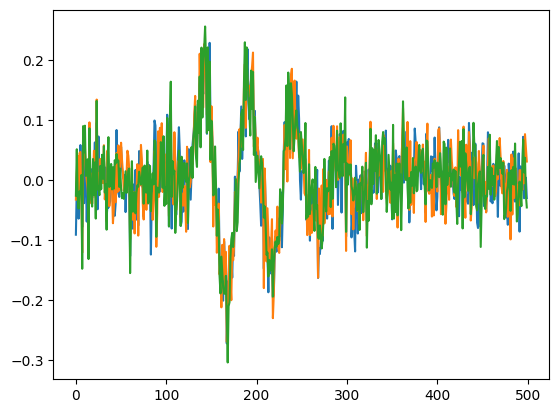

In [12]:
# Plot some examples.
plt.plot(ERP0[0,:]);
plt.plot(ERP0[1,:]);
plt.plot(ERP0[2,:]);

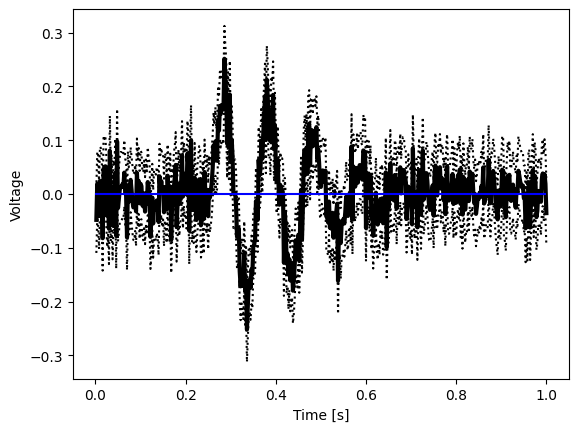

In [13]:
# Compute 95% CI from our 3000 resampled ERPs
ERP0_sorted = np.sort(ERP0,0)             # Sort each column of the resampled ERP
ciL = ERP0_sorted[75,:]                    # Determine the lower CI
ciU = ERP0_sorted[-75,:]                    # ... and the upper CI
mnA = EEGa.mean(0)                               # Determine the ERP for condition A
plt.plot(t, mnA, 'k', lw=3)               # ... and plot it
plt.plot(t, ciL, 'k:')                    # ... and plot the lower CI
plt.plot(t, ciU, 'k:')                    # ... and the upper CI
plt.hlines(0, 0, 1, 'b')                  # plot a horizontal line at 0
plt.xlabel('Time [s]')                    # ... and label the axes
plt.ylabel('Voltage');

### Comparing ERPs <a class="anchor" id="comparing-erps"></a>

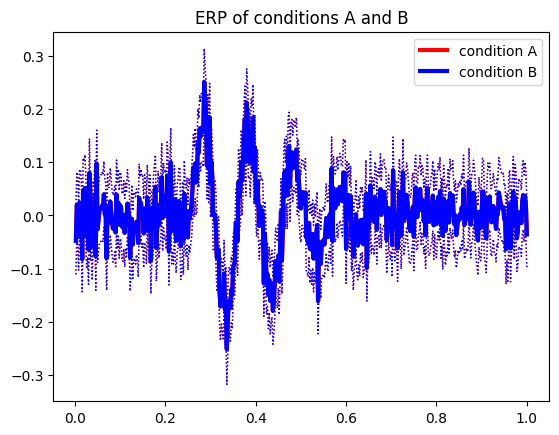

In [14]:
erpA = EEGa.mean(0)    # Compute the mean across trials (the ERP)
sdA  = EEGa.std(0)    # Compute the sd across trials 
sdmnA= sd / np.sqrt(ntrials)    # Compute the s.d.m.n

erpB = EEGa.mean(0)   # Compute the mean across trials (the ERP)
sdB  = EEGa.std(0)    # Compute the sd across trials 
sdmnB= sd / np.sqrt(ntrials)    # Compute the s.d.m.n

plt.plot(t, erpA, 'r', lw=3, label='condition A')  # Plot the ERP of condition A
plt.plot(t, erpA + 2 * sdmnA, 'r:', lw=1)           # ... and include the upper CI
plt.plot(t, erpA - 2 * sdmnA, 'r:', lw=1)           # ... and the lower CI

plt.plot(t, erpB, 'b', lw=3, label='condition B')  # Plot the ERP of condition B
plt.plot(t, erpB + 2 * sdmnB, 'b:', lw=1)           # ... and include the upper CI
plt.plot(t, erpB - 2 * sdmnB, 'b:', lw=1)           # ... and the lower CI

plt.title('ERP of conditions A and B')
plt.legend()
plt.show()

### A Bootstrap Test to Compare ERPs <a id="bootstrap"></a>

In [15]:
mnA = np.mean(EEGa,0)          # Determine ERP for condition A
mnB = np.mean(EEGb,0)          # Determine ERP for condition B
mnD = mnA - mnB                # Compute the differenced ERP
stat = np.max(np.abs(mnD))     # Compute the statistic
print('stat = {:.4f}'.format(stat))

stat = 0.2884


The biggest difference between the biggest lines

In [16]:
EEG = np.vstack((EEGa, EEGb))  # Step 1. Merge EEG data from all trials
np.random.seed(123)            # Fix seed for reproducibility

N_resample = 3000;
stat0 = np.zeros(N_resample)
for k in np.arange(0,N_resample):
    
    i      = np.random.randint(0, 2000, size = ntrials)    # Create resampled indices.
    EEG0   = EEG[i,:]   # Create a resampled EEG for "condition A".
    ERP0_A = EEG0.mean(0)   # Create a resampled ERP for "condition A".
    
    i      = np.random.randint(0, 2000, size=ntrials)    # Create resampled indice from 0 to 1000
    EEG0   = EEG[i,:]   # Create a resampled EEG for "condition B".
    ERP0_B = EEG0.mean(0)    # Create a resampled ERP for "condition B".
    
    MnD = ERP0_A - ERP0_B
    stat0[k] = np.max(np.abs(mnD)) # Compute the stat from the resampled ERPs

0.0

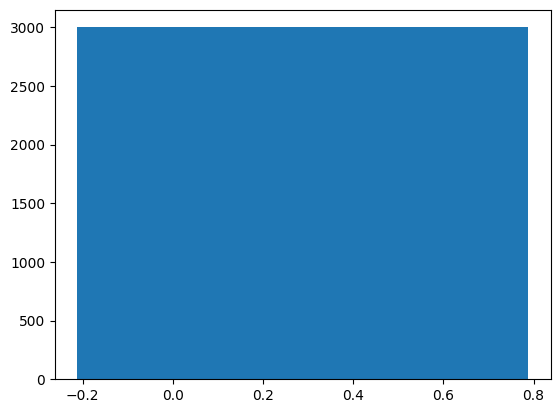

In [17]:
# Plot the observed stat vs the resampled stat.
plt.figure()
plt.hist(stat0, bins='auto')
plt.vlines(stat, 0, 100)
np.size(np.where(stat0>stat)) / stat0.size